**Data Analysis and Visualization**

In [1]:
# importing require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('sentiment.csv')
df.head()

,Phrase,label
0,Spider-man is better than any summer blockbust...,Positive
1,of good sense,Positive
2,", then knock yourself out and enjoy the big sc...",Negative
3,So could young romantics out on a date .,Positive
4,humour,Positive


In [3]:
# shape of the dataset
df.shape

(2800, 2)

In [4]:
# checking how many positive or negative values are there
df.label.value_counts()

Positive    1800
Negative    1000
Name: label, dtype: int64

In [5]:
# checking the null values
df.isnull().sum()

Phrase    0
label     0
dtype: int64

In [6]:
# finding the unique values from the phrase
unique_words = list(df['Phrase'].str.split(' ', expand=True).stack().unique())

print(unique_words)

['Spider-man', 'is', 'better', 'than', 'any', 'summer', 'blockbuster', 'we', 'had', 'to', 'endure', 'last', ',', 'and', 'hopefully', 'sets', 'the', 'tone', 'for', 'a', 'of', 'good', 'stuff', '.', 'sense', 'then', 'knock', 'yourself', 'out', 'enjoy', 'big', 'screen', 'postcard', 'that', 'self-glorified', 'Martin', 'Lawrence', 'lovefest', 'So', 'could', 'young', 'romantics', 'on', 'date', 'humour', 'You', 'bet', 'there', 'it', "'s", 'what', 'makes', 'this', 'rather', 'convoluted', 'journey', 'worth', 'taking', 'tries', 'more', 'Screenwriter', 'Chris', 'ver', 'Weil', 'directing', 'debut', 'good-natured', 'never', 'dull', 'but', 'mood', 'in', 'which', 'an', 'ominous', 'pervasive', 'unknown', 'threat', 'lurks', 'just', 'below', 'proceedings', 'adds', 'almost', 'constant', 'mindset', 'suspense', 'centers', 'midlife', 'crisis', 'hate', 'putting', 'together', 'movies', 'particular', 'value', 'or', 'merit', 'sensual', 'funny', 'Some', 'computer', 'animation', 'handsome', 'right', 'questions', '

In [7]:
# count the unique word from phrase
unique_word_count = df.Phrase.str.split(' ', expand=True).stack().value_counts()

print(unique_word_count)

the         995
,           817
a           740
and         702
of          701
           ... 
generate      1
Favor         1
!             1
Just          1
primary       1
Length: 1979, dtype: int64


Here, the must frequent word is `the` and total number of unique words is `1979`.

In [8]:
# counting the workds in each row
df['WordCount'] = df['Phrase'].str.split().str.len()

df.head()

,Phrase,label,WordCount
0,Spider-man is better than any summer blockbust...,Positive,27
1,of good sense,Positive,3
2,", then knock yourself out and enjoy the big sc...",Negative,19
3,So could young romantics out on a date .,Positive,9
4,humour,Positive,1


In [9]:
# checking if there is empyt Phrase or not
df[df['WordCount'] == 0]

,Phrase,label,WordCount
981,,Negative,0


In [10]:
# dropping the index which has no phrase
df.drop(df[df['WordCount'] == 0].index, inplace=True)

df.shape

(2799, 3)

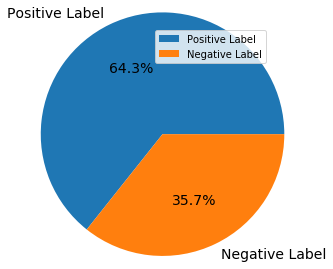

In [11]:
# plotting the pie chart
pos_total = len(df[df['label'] == 'Positive'])
neg_total = len(df[df['label'] == 'Negative'])

textprops = {'fontsize': 14}
plt.pie(x=[pos_total, neg_total], labels=['Positive Label', 'Negative Label'], textprops=textprops, autopct='%0.1f%%', radius=1.4)

plt.legend()
plt.show()

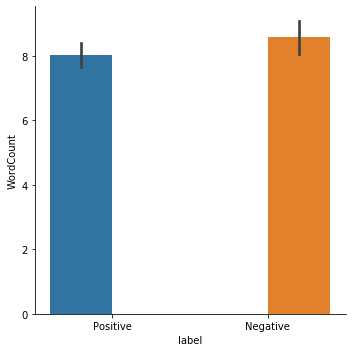

In [12]:
# average wordcount par plot

sns.catplot(x='label', y='WordCount', data=df, kind='bar', hue='label')
plt.show()

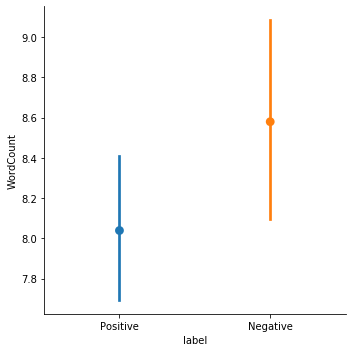

In [13]:
# plotting the categorical data

sns.catplot(x='label', y='WordCount', data=df, kind='point', hue='label')
plt.show()

The above plots shows that the `Negative` label has slightly more word count than the `Positive` word count in general.

**Feature Extraction**

Seperating the train, test & validation dataset.

In [16]:
# seperating train, test and validate set
total_len = len(df)
train_len = int(0.6 * total_len)
val_len = int(0.2 * total_len)

print('Total Length: ', total_len)
print('Train Length: ', train_len)
print('Validation Length: ', val_len)
print('Test Length: ', val_len)

Total Length:  2799
Train Length:  1679
Validation Length:  559
Test Length:  559


In [19]:
# splitting dataset into train, test & val datset
train_df = df[: train_len]
val_df = df[train_len: train_len + val_len]
test_df = df[train_len + val_len: ]

print('train_df len: ', len(train_df))
print('val_df len: ', len(val_df))
print('test_df len: ', len(test_df))

train_df len:  1679
val_df len:  559
test_df len:  561


Extracting unique vocal from the training dataset.

In [22]:
vocab = list()

for i in train_df['Phrase'].tolist():
    vocab.extend(i.split(' '))
    
unique_vocab = list(set(vocab))

print('Vocab length: ', len(vocab))
print('Unique vocab length: ', len(unique_vocab))

Vocab length:  13853
Unique vocab length:  1843


In [23]:
def feature_extraction(unique_vocab, dataset):
    
    # vectorizing the phrase
    feature = []
    label = []
    
    for index, row in dataset.iterrows():
        row_words = row['Phrase'].split(' ')
        
        f = []
        for v in unique_vocab:
            if v in row_words:
                f.append(1)
            else:
                f.append(0)
                
        if row['label'] == 'Positive':
            label.append(1)
        elif row['label'] == 'Negative':
            label.append(0)
            
        feature.append(f)
    
    # converting into numpy array
    feature = np.array(feature)
    label = np.array(label)
    
    # changing label into 2d array
    label = label.reshape(-1, 1)
    print('Feature shape: ', feature.shape)
    
    return feature, label

In [24]:
# creating X_train, y_train of feature and label from a dataset
X_train, y_train = feature_extraction(unique_vocab, train_df)
X_val, y_val = feature_extraction(unique_vocab, val_df)
X_test, y_test = feature_extraction(unique_vocab, test_df)

Feature shape:  (1679, 1843)
Feature shape:  (559, 1843)
Feature shape:  (561, 1843)


In [25]:
# Adding bias to x data
X_train = np.insert(X_train, 0, values=1, axis=1)
X_val = np.insert(X_val, 0, values=1, axis=1)
X_test = np.insert(X_test, 0, values=1, axis=1)

Here, all our data is `0 and 1`. so, we dnt have to do any normalization here.

**Grid Search**

In [27]:
np.random.seed(42)

params = {
    'num_of_iteration': 1000,
    'learning_rate': 0.001
}

grid_params = {
    'num_of_iteration': [1000, 1500, 2000, 2500], 
    'learning_rate': [0.001, 0.01, 0.1, 0.6]
}

Binary Cross Entropy Loss and Sigmoid function

In [28]:
# bcel
def binary_cross_entropy_loss(h, y):
    m = len(h)
    
    return -np.average(y * np.log(h) + (1 - y) * np.log(1 - h))


# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Training Model

In [29]:
def train_model(X_train, y_train, X_val, y_val, params):
    train_error = []
    w = np.random.rand(X_train.shape[1]).reshape(-1, 1)
    
    for i in range(0, params['num_of_iterations']):
        h_train = sigmoid(np.matmul(X_train, w))
        train_loss = binary_cross_entropy_loss(h_train, y_train)
        train_error.append(train_loss)
        
        gradient_descent = (np.matmul(np.transpose(X_train), (h_train - y_train))) / X_train.shape[0]
        w = w - params['learning_rate'] * gradient_descent
        
    
    h_val = sigmoid(np.matmul(X_val, w))
    val_loss = binary_cross_entropy_loss(h_val, y_val)
    print(params, val_loss)
    
    return w, train_error

**Parameter with val loss**

In [31]:
# grid search
import itertools

grid = list(itertools.product(grid_params['num_of_iteration'], grid_params['learning_rate']))


for g in grid:
    p = {
        'num_of_iterations': g[0],
        'learning_rate': g[1]
    }
    
    train_model(X_train, y_train, X_val, y_val, p)

{'num_of_iterations': 1000, 'learning_rate': 0.001} 1.4593497866218992
{'num_of_iterations': 1000, 'learning_rate': 0.01} 0.8916758730910846
{'num_of_iterations': 1000, 'learning_rate': 0.1} 0.5552828426718963
{'num_of_iterations': 1000, 'learning_rate': 0.6} 0.4058936846842115
{'num_of_iterations': 1500, 'learning_rate': 0.001} 1.3609936822386934
{'num_of_iterations': 1500, 'learning_rate': 0.01} 0.8554623226830117
{'num_of_iterations': 1500, 'learning_rate': 0.1} 0.5320832129012135
{'num_of_iterations': 1500, 'learning_rate': 0.6} 0.3846666832920364
{'num_of_iterations': 2000, 'learning_rate': 0.001} 1.2875999923591088
{'num_of_iterations': 2000, 'learning_rate': 0.01} 0.7895518938559557
{'num_of_iterations': 2000, 'learning_rate': 0.1} 0.514189997981818
{'num_of_iterations': 2000, 'learning_rate': 0.6} 0.3653870117713219
{'num_of_iterations': 2500, 'learning_rate': 0.001} 1.264794362599046
{'num_of_iterations': 2500, 'learning_rate': 0.01} 0.7482513782130533
{'num_of_iterations': 25

In [33]:
final_params = {
    'num_of_iterations': 2500,
    'learning_rate': 0.6
}

final_weights, train_loss = train_model(X_train, y_train, X_val, y_val, final_params)

{'num_of_iterations': 2500, 'learning_rate': 0.6} 0.34336854752113327


**Train loss plot in the best model**

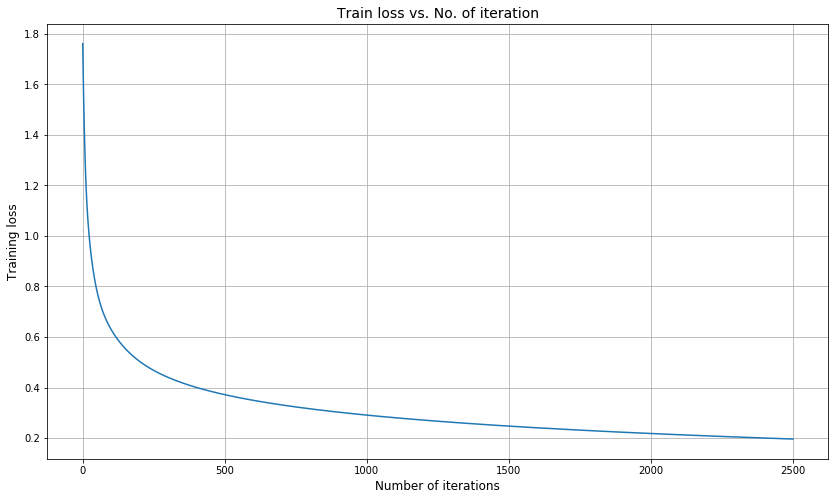

In [37]:
# plotting train_loss vs number of iteration
plt.figure(figsize=(14, 8))

plt.plot(train_loss)

plt.title('Train loss vs. No. of iteration', fontsize=14)
plt.xlabel('Number of iterations', fontsize=12)
plt.ylabel('Training loss', fontsize=12)

plt.grid()
plt.show()

This shows that our `training loss` is decreses with increaing in `number of iterations`.

In [ ]:
**Model Evaluation**

In [40]:
def prediction_data(X_test, final_weights, threshold):
    predictions = sigmoid(np.matmul(X_test, final_weights))
    final_predictions = []
    
    for x in predictions:
        if x >= threshold:
            final_predictions.append(1)
        else:
            final_predictions.append(0)
            
    return final_predictions


# predictions
prediction = prediction_data(X_test, final_weights, 0.5)

In [44]:
# confusion matrix function
def get_confusion_matrix(actual, predicted):
    confusion_matrix = np.zeros((2, 2))
    
    for x, y in zip(actual, predicted):
        confusion_matrix[x, y] += 1
        
    return confusion_matrix

In [45]:
# get confusion matrix
confusion_matrix = get_confusion_matrix(y_test, prediction)

print(confusion_matrix)

[[150.  63.]
 [ 30. 318.]]


In [46]:
# accuracy
accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1]) / np.sum(confusion_matrix)

print('Accuracy: ', accuracy)

Accuracy:  0.8342245989304813


In [47]:
# recall = TP / (TP +FN)
recall = (confusion_matrix[0][0]) / (confusion_matrix[0][0] + confusion_matrix[0][1])

print('Recall: ', recall)

Recall:  0.704225352112676


In [48]:
# Precision = TP / (TP + FP)
precision = (confusion_matrix[0][0]) / (confusion_matrix[0][0] + confusion_matrix[1][0])

print('Precision: ', precision)

Precision:  0.8333333333333334


In [49]:
# F1-Score
f1_score = (2 * recall * precision) / (recall + precision)

print('F1 score: ', f1_score)

F1 score:  0.7633587786259541


In [51]:
# contructing ROC curve
tpr = []
fpr = []

for threshold in np.arange(0, 1, 0.1):
    prediction = prediction_data(X_test, final_weights, threshold)
    confusion_matrix = get_confusion_matrix(y_test, prediction)
    
    t_p_r = (confusion_matrix[0][0]) / (confusion_matrix[0][0] + confusion_matrix[0][1])
    f_p_r = (confusion_matrix[1][0]) / (confusion_matrix[1][0] + confusion_matrix[1][1])
    
    tpr.append(t_p_r)
    fpr.append(f_p_r)

Plotting ROC curve

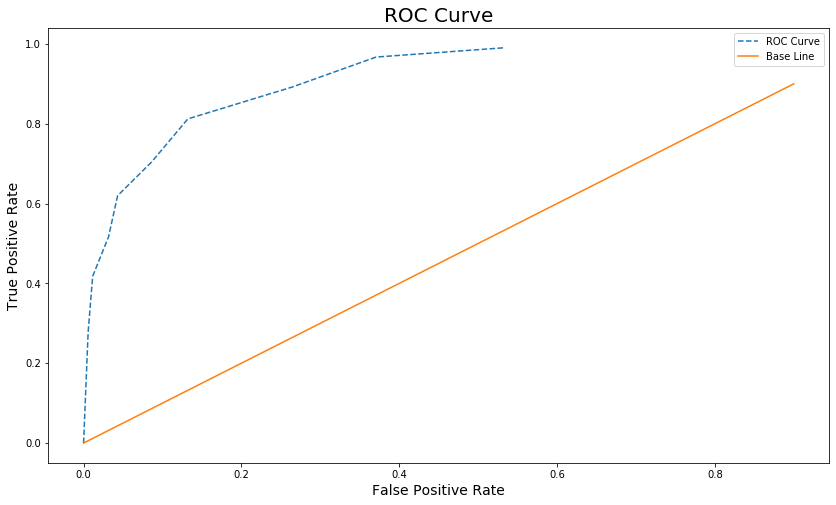

In [52]:
# ROC curve
plt.figure(figsize = (14, 8))

base = np.arange(0,1,0.1)
plt.plot(fpr, tpr, linestyle = '--', label = 'ROC Curve')
plt.plot(base, base, label = 'Base Line')

plt.title('ROC Curve', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)

plt.legend()
plt.show()